In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#seeds = [10, 26, 31, 34, 44, 47, 67, 76, 86, 89]
#seeds = [7, 8, 12, 19, 30, 41, 43, 68, 71, 84]
#seeds = [2, 6, 8, 11, 14, 25, 27, 30, 39, 40, 45, 46, 47, 50, 52, 53, 55, 65, 77, 78, 82, 85, 86, 91, 93]
seeds = np.arange(100)
random_state=42

In [3]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [4]:
col_names = data.columns
X = data[col_names[3:]]
y = data[col_names[2]]

In [5]:
X_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(X)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.1, random_state=random_state)
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

In [7]:
pos_idxs = []
col_above = []

In [8]:
p = np.random.default_rng().permutation(len(X.columns))
print(X.columns[:10])
print(X.columns[p][:10])

Index(['MW', 'AMW', 'Mv', 'Mi', 'nTA', 'RBF', 'nDB', 'nAB', 'nN', 'nHet'], dtype='object')
Index(['H1v', 'MATS5m', 'ATSC2e', 'B03[C-O]', 'QXXs', 'SM03_AEA(ri)', 'IC1',
       'Mor11s', 'B03[O-O]', 'nROH'],
      dtype='object')


In [9]:
i = 0
for seed in seeds:
    i += 1
    #print('Seed: {}'.format(seed))
    rng = np.random.default_rng(seed=seed)
    for run in range(100):
        #print('Seed: {}, run: {}'.format(seed, run))
        X_train['random'] = rng.random(size=len(X_train))
        perm = rng.permutation(len(X_train.columns))
        X_perm = X_train[X_train.columns[perm]]
        rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, bootstrap=True, random_state=seed)
        rf.fit(X_perm, y_train)
        feature_importances_sorted, X_col_sorted = zip(*sorted(zip(rf.feature_importances_, X_perm.columns), reverse=True))
        pos_idxs.append(X_col_sorted.index('random'))
        col_above.append(X_perm.columns[:pos_idxs[-1]])
        #col_above += [col for col in X_scaled.columns[:pos_idxs[-1]]]
    print('{}% done'.format(i*100//len(seeds)))

1% done
2% done
3% done
4% done
5% done
6% done
7% done
8% done
9% done
10% done
11% done
12% done
13% done
14% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
23% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
31% done
32% done
33% done
34% done
35% done
36% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
47% done
48% done
49% done
50% done
51% done
52% done
53% done
54% done
55% done
56% done
57% done
58% done
59% done
60% done
61% done
62% done
63% done
64% done
65% done
66% done
67% done
68% done
69% done
70% done
71% done
72% done
73% done
74% done
75% done
76% done
77% done
78% done
79% done
80% done
81% done
82% done
83% done
84% done
85% done
86% done
87% done
88% done
89% done
90% done
91% done
92% done
93% done
94% done
95% done
96% done
97% done
98% done
99% done
100% done


In [10]:
plt.figure()
plt.hlines(1,1, len(X_scaled.columns),colors='r')
plt.eventplot(pos_idxs, orientation='horizontal', colors='b', alpha=0.3)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 432x288 with 0 Axes>

In [11]:
col_names = [l for lst in col_above for l in lst ]
col_counts = Counter(col_names)

In [12]:
col_counts = {k: v/100 for k, v in sorted(col_counts.items(), key=lambda item: item[1], reverse=True)}
col_counts

{'VE2_G/D': 20.26,
 'Eig14_EA(dm)': 20.25,
 'Mor31m': 20.1,
 'TDB04u': 20.03,
 'HATS1e': 19.99,
 'HATS3p': 19.97,
 'RDF015p': 19.95,
 'Mor17s': 19.91,
 'N-072': 19.89,
 'O-057': 19.85,
 'MATS2m': 19.84,
 'E2m': 19.83,
 'RDF035v': 19.82,
 'Dp': 19.79,
 'CATS2D_00_AA': 19.79,
 'CATS3D_03_DL': 19.78,
 'SpPosA_D/Dt': 19.75,
 'CATS2D_02_AP': 19.75,
 'SpMaxA_EA(bo)': 19.74,
 'F03[C-N]': 19.74,
 'RDF080e': 19.71,
 'Chi_RG': 19.71,
 'HATS0e': 19.7,
 'CATS2D_06_PP': 19.69,
 'Eta_beta_A': 19.69,
 'SaaNH': 19.69,
 'MATS3v': 19.68,
 'SpMax6_Bh(s)': 19.68,
 'Mor09s': 19.68,
 'CATS2D_02_PL': 19.67,
 'HATS6p': 19.67,
 'Chi_Dz(e)': 19.67,
 'SsOH': 19.66,
 'Mor19p': 19.66,
 'H4i': 19.65,
 'Eta_FL_A': 19.65,
 'SAacc': 19.65,
 'R6m+': 19.65,
 'SpMAD_B(s)': 19.65,
 'SpMAD_G/D': 19.64,
 'R5m': 19.64,
 'TDB04i': 19.63,
 'nOHs': 19.63,
 'SM07_EA(bo)': 19.63,
 'GATS2m': 19.61,
 'SpMax2_Bh(e)': 19.61,
 'R4s': 19.61,
 'GATS6v': 19.61,
 'Ts': 19.61,
 'CATS2D_07_DD': 19.61,
 'CATS2D_04_AL': 19.6,
 'F06[C-C]': 19.

In [13]:
print(col_counts['random'], list(col_counts.keys()).index('random'))

19.3 248


<AxesSubplot:>

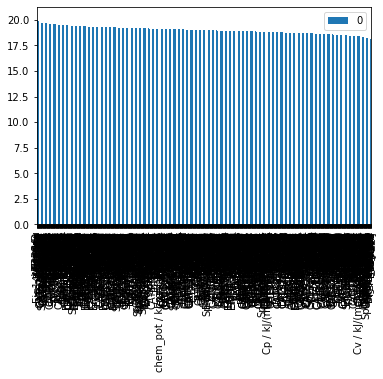

In [14]:
df = pd.DataFrame.from_dict(col_counts, orient='index')
df.plot(kind='bar')

In [15]:
len(col_counts.keys())

1261

In [16]:
number_of_features = 5
selected_features = []
for key in col_counts.keys():
    if len(selected_features) == number_of_features:
        break
    selected_features.append(key)
selected_features

['VE2_G/D', 'Eig14_EA(dm)', 'Mor31m', 'TDB04u', 'HATS1e']

In [17]:
np.save('attribute_counts.npy', col_counts)

In [18]:
rd = np.load('attribute_counts.npy', allow_pickle=True).item()

In [19]:
rd['random']

19.3

In [20]:
most_used = ['P_VSA_MR_5', 'Mor04m', 'E1p', 'Mor22s', 'LUMO / eV']
for m in most_used:
    print(m, rd[m])

P_VSA_MR_5 19.39
Mor04m 18.52
E1p 18.77
Mor22s 19.02
LUMO / eV 18.97


In [21]:
for m in selected_features:
    print(m, rd[m])

VE2_G/D 20.26
Eig14_EA(dm) 20.25
Mor31m 20.1
TDB04u 20.03
HATS1e 19.99


In [ ]:
y_valid